In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob
import tweepy # For Twitter's API
import emoji
from IPython.display import display

In [2]:
import pprint # For "pretty-printing" of Python objects -- easier to interprate output 
pp = pprint.PrettyPrinter() # Create a pprint object

Import preprocess.py file which contains defined functions that will load objects and create dataframes.
We should add to this file as we unpack these columns from the json

In [3]:
from preprocess import tweet_open, extract_emojis

In [4]:
hash_tags = tweet_open('hash.json')
print('There are {} tweets in this data frame.'.format(hash_tags.shape[0]))
#hash_tags.to_csv('hash.csv', index=False)

There are 144 tweets in this data frame.


In [5]:
hash_tags.head()

,favoriteCount,hashtags,id,images,isPinned,isReplyTo,isRetweet,quote,replyCount,retweetCount,screenName,text,time,urls,userMentions
0,0,"[{'hashtag': 'thefour', 'indices': [70, 78]}, ...",1039682159496364032,[],False,False,False,NaN,0,0,jariodDAPRINCE,Ali caldwell the performance you forgot way be...,2018-09-12 01:08:37,[{'url': 'subscribehttps://youtu.be/7jy50QIHCC...,"[{'screenName': 'alicaldwellfp1', 'indices': [..."
1,2,[],1039681642783068160,[],False,False,False,NaN,0,0,AlexisLCal,So the real question is: why do people expect ...,2018-09-12 01:06:34,[],[]
2,48,[],1039653891703496704,[],False,False,False,"{'screenName': 'DeAndreP25', 'id': '1039332878...",5,8,iamAliCaldwell,Omg! YES! Thank you! 🙏🏾 🙌🏾 New music coming s...,2018-09-11 23:16:18,[{'url': 'soonhttps://twitter.com/deandrep25/s...,[]
3,0,[],1039609678919942144,[],False,False,False,NaN,0,0,AlexisLCal,Where was this Spain team for my World Cup bra...,2018-09-11 20:20:37,[],[]
4,1,[],1039607802056962048,[],False,False,False,NaN,0,0,AlexisLCal,"Tag yourself, are you World Cup runner up Croa...",2018-09-11 20:13:09,[],[]


In [6]:
ali_1 = tweet_open('ali_1.json')
print('There are {} tweets in this data frame.'.format(ali_1.shape[0]))
# ali_1_df.to_csv('ali_1.csv', index=False)
ali_1.head()

There are 14270 tweets in this data frame.


,fullname,html,id,likes,replies,retweets,text,timestamp,url,user
0,S. Turner,"<p class=""TweetTextSize js-tweet-text tweet-te...",4836685043,0,0,0,@Alison0206 its a boy!!! his name is Polo... I...,2009-10-13 15:04:41,/JustShevy/status/4836685043,JustShevy
1,Ali,"<p class=""TweetTextSize js-tweet-text tweet-te...",4376497994,0,0,0,"Overheard: from season 4, episode 11: Be All M...",2009-09-25 19:48:50,/ali_telford/status/4376497994,ali_telford
2,Ali,"<p class=""TweetTextSize js-tweet-text tweet-te...",4032762208,0,0,0,"Overheard: from season 2, episode 13: Critical...",2009-09-16 16:40:51,/ali_telford/status/4032762208,ali_telford
3,v klip,"<p class=""TweetTextSize js-tweet-text tweet-te...",2126035456,0,0,0,"Obama in Cairo as seen by Hirsi Ali, Paglia an...",2009-06-12 02:52:50,/vklip/status/2126035456,vklip
4,Radio 4 auto text,"<p class=""TweetTextSize js-tweet-text tweet-te...",1699161882,0,0,0,Start the Week. Andrew Marr's guests are Monic...,2009-05-04 20:30:01,/bbcradio4live/status/1699161882,bbcradio4live


In [30]:
ali_2 = tweet_open('ali_2.json')
print('There are {} tweets in this data frame.'.format(ali_2.shape[0]))
# ali_2.to_csv('ali_2.csv', index=False)

There are 7471 tweets in this data frame.


In [32]:
ali_cadwell = tweet_open('ali_cadwell.json')
print('There are {} tweets in this data frame.'.format(ali_cadwell.shape[0]))
# ali_cadwell.to_csv('ali_cadwell.csv', index=False)

There are 137 tweets in this data frame.


In [33]:
ali_mentions = tweet_open('ali_mentions.json')
print('There are {} tweets in this data frame.'.format(ali_mentions.shape[0]))
# ali_mentions.to_csv('ali_mentions.csv', index=False)

There are 33616 tweets in this data frame.


In [35]:
mention_df = tweet_open('mention.json')
print('There are {} tweets in this data frame.'.format(mention_df.shape[0]))
# mention_df.to_csv('mention.csv', index=False)

There are 5113 tweets in this data frame.


In [36]:
test = tweet_open('test.json')
print('There are {} tweets in this data frame.'.format(test.shape[0]))
# test.to_csv('test.csv', index=False)

There are 683 tweets in this data frame.


In [37]:
testing = tweet_open('testing.json')
print('There are {} tweets in this data frame.'.format(testing.shape[0]))
# testing.to_csv('testing.csv', index=False)

There are 6221 tweets in this data frame.


In [72]:
DFs = [testing, test, mention_df, ali_mentions, ali_cadwell, ali_2, ali_1, hash_tags]
DF_cols = list(np.unique(np.array([list(set(df.columns)) for df in DFs])))
print(DF_cols[0], '\n\n', DF_cols[1])

['likes', 'html', 'timestamp', 'replies', 'retweets', 'url', 'text', 'user', 'fullname', 'id'] 

 ['quote', 'retweetCount', 'favoriteCount', 'userMentions', 'screenName', 'replyCount', 'isReplyTo', 'urls', 'text', 'time', 'isRetweet', 'isPinned', 'hashtags', 'images', 'id']


Using two different twitter scraper, we get two different sets of columns.

In [84]:
testing.head()

,fullname,html,id,likes,replies,retweets,text,timestamp,url,user
0,Shaun,"<p class=""TweetTextSize js-tweet-text tweet-te...",296691362802311168,0,0,5,"Wigan team to face soton Ali,caldwell,scharner...",2013-01-30 18:48:27,/SG191189/status/296691362802311168,SG191189
1,CWorly,"<p class=""TweetTextSize js-tweet-text tweet-te...",292913445442039808,0,2,0,@tonywelsby yes. Sunderland pressuring us didn...,2013-01-20 08:36:22,/Worly82/status/292913445442039808,Worly82
2,Emily Howlett,"<p class=""TweetTextSize js-tweet-text tweet-te...",290668815791042560,0,0,0,"I posted 9 photos on Facebook in the album ""Al...",2013-01-14 03:57:00,/emareehowlett/status/290668815791042560,emareehowlett
3,VimeoGirls.tv,"<p class=""TweetTextSize js-tweet-text tweet-te...",278259090919137280,0,0,0,'I wanted to be found' - Ali Caldwell http://d...,2012-12-10 22:05:11,/VimeoGirls_tv/status/278259090919137282,VimeoGirls_tv
4,avalon1982,"<p class=""TweetTextSize js-tweet-text tweet-te...",270023547274027008,0,0,0,'I wanted to be found' - Ali Caldwell (by Vivi...,2012-11-18 04:40:05,/avalon1982/status/270023547274027009,avalon1982


In [85]:
test.head() # Not necessary: images, 

,favoriteCount,hashtags,id,images,isPinned,isReplyTo,isRetweet,quote,replyCount,retweetCount,screenName,text,time,urls,userMentions
0,45,[],1039653891703496704,[],False,False,False,"{'screenName': 'DeAndreP25', 'id': '1039332878...",5,8,iamAliCaldwell,Omg! YES! Thank you! 🙏🏾 🙌🏾 New music coming s...,2018-09-11 23:16:18,[{'url': 'soonhttps://twitter.com/deandrep25/s...,[]
1,107,[],1038185566679060480,[],False,False,False,NaN,4,33,iamAliCaldwell,You never know what someone is going through! ...,2018-09-07 22:01:42,[],[]
2,96,[],1038185095818043392,[],False,False,False,NaN,0,20,iamAliCaldwell,Mannnnn another young soul gone from drug over...,2018-09-07 21:59:50,[],[]
3,9,[],1037786580549873664,[],False,False,False,NaN,1,1,iamAliCaldwell,Excited 🤗,2018-09-06 19:36:16,[],[]
4,64,[],1037786304438775808,[],False,False,False,NaN,3,4,iamAliCaldwell,Shooting a commercial tomorrow! Can’t wait to ...,2018-09-06 19:35:10,[],[]


# Create a Twitter App
All cells from here up to 'Creating a Dataframe of tweets' is only for experimenting with Twitter API, which is very limiting in terms of
- amount of requests
- price to get FullArchive
- difficult to understand endpoints and usage of operators

***Do not run these cells...they won't work***

In [100]:
from credentials import *

In [5]:
# API's setup
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with access keys provided.
    """
    
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    
    # Return API with authentication:
    api = tweepy.API(auth)
    return api

# Tweets Extraction

In [7]:
# Create an extractor object:
extractor = twitter_setup()

# Create a tweet list as follows:
screen_name = "iAmAliCaldwell"
count = 200
tweets = extractor.user_timeline(screen_name=screen_name, count=count)
print("Number of tweets extracted: {}".format(len(tweets)))

Number of tweets extracted: 200


In [253]:
tweets_test2 = []
for tweet in tweepy.Cursor(extractor.search,
                           q=query,
                           count=200,
#                            result_type="recent",
                           include_entities=True,
                           lang="en").items():
    print(tweet.created_at, tweet.text, tweet.)
    tweets_test2.append(tweet)

2018-09-14 11:31:01 Aretha Franklin - Natural Woman - (singer Ali Caldwell &amp; Andre Sims Tribute) https://t.co/UXHD9WyHsr via @YouTube #NewMusic
2018-09-14 07:34:41 The trend is your friend? https://t.co/jhkSroCt6O foxtv, fergie, dj khaled, diddy, meghan trainor, the four, the fo… https://t.co/xVyzNLXRN7
2018-09-14 07:30:43 New trending GIF tagged foxtv, fergie, dj khaled, diddy, meghan trainor, the four, the four on fox, james graham, s… https://t.co/Q7Rg1RLl4S
2018-09-14 07:23:37 RT @iamAliCaldwell: Aretha Franklin - Natural Woman - (Ali Caldwell &amp; Andre Sims Tribute): https://t.co/d2AgSCwHt9 via @YouTube
2018-09-14 04:04:59 Aretha Franklin - Natural Woman - (Ali Caldwell &amp; Andre Sims Tribute) https://t.co/SPzcGhPXMT via @YouTube @iamAliCaldwell 🎶🎤
2018-09-14 01:13:39 This sister is truly gifted! If you’re an Ali Caldwell fan, check out her tribute to The Queen of Soul, Aretha Fran… https://t.co/qYKpjbacN6
2018-09-14 01:12:44 I liked a @YouTube video https://t.co/PBnD1ajzz

In [241]:
query = '"ali caldwell" OR #alicaldwell since:2010-01-01'
tweets_2 = extractor.search(q=query)

In [249]:
for tweet in tweets_2:
    print(tweet.created_at, "\n", tweet.)
    print()

2018-09-14 11:31:01 
 Aretha Franklin - Natural Woman - (singer Ali Caldwell &amp; Andre Sims Tribute) https://t.co/UXHD9WyHsr via @YouTube #NewMusic

2018-09-14 07:34:41 
 The trend is your friend? https://t.co/jhkSroCt6O foxtv, fergie, dj khaled, diddy, meghan trainor, the four, the fo… https://t.co/xVyzNLXRN7

2018-09-14 07:30:43 
 New trending GIF tagged foxtv, fergie, dj khaled, diddy, meghan trainor, the four, the four on fox, james graham, s… https://t.co/Q7Rg1RLl4S

2018-09-14 07:23:37 
 RT @iamAliCaldwell: Aretha Franklin - Natural Woman - (Ali Caldwell &amp; Andre Sims Tribute): https://t.co/d2AgSCwHt9 via @YouTube

2018-09-14 04:04:59 
 Aretha Franklin - Natural Woman - (Ali Caldwell &amp; Andre Sims Tribute) https://t.co/SPzcGhPXMT via @YouTube @iamAliCaldwell 🎶🎤

2018-09-14 01:13:39 
 This sister is truly gifted! If you’re an Ali Caldwell fan, check out her tribute to The Queen of Soul, Aretha Fran… https://t.co/qYKpjbacN6

2018-09-14 01:12:44 
 I liked a @YouTube video ht

Note: each element in the tweets list is a tweet object from Tweepy

In [205]:
# Print the most recent 5 tweets:
print("5 recent tweets: \n")
for tweet in tweets[:5]:
    print(tweet.created_at, "\n", tweet.text)
    print()

5 recent tweets: 

2018-09-14 01:08:41 
 R.I.P Queen👑 @ArethaFranklin 
😥❤❤❤❤❤
https://t.co/rb8OAN4mco

2018-09-14 00:40:06 
 Aretha Franklin - Natural Woman - (Ali Caldwell &amp; Andre Sims Tribute): https://t.co/d2AgSCwHt9 via @YouTube

2018-09-11 23:16:18 
 Omg! YES! Thank you! 🙏🏾  🙌🏾 New music coming soon❤️ https://t.co/riQZl7YASp

2018-09-07 22:01:42 
 You never know what someone is going through! 

BE KIND!
Love MORE!
You just NEVER KNOW!

2018-09-07 21:59:50 
 Mannnnn another young soul gone from drug overdose... so sad! 😢 Reading his last tweets got me so emotional! 🙏🏾 Pra… https://t.co/M6gecmcZRY



In [210]:
# Create a pandas dataframe:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns = ['Tweets'])

# Display the first 10 elements of the dataframe
display(data.head())

,Tweets
0,R.I.P Queen👑 @ArethaFranklin \n😥❤❤❤❤❤\nhttps:/...
1,Aretha Franklin - Natural Woman - (Ali Caldwel...
2,Omg! YES! Thank you! 🙏🏾 🙌🏾 New music coming s...
3,You never know what someone is going through! ...
4,Mannnnn another young soul gone from drug over...


In [211]:
# Internal methods of a single tweet object
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [213]:
# We print info from the first tweet:
print('ID: ', tweets[0].id)
print('Created at: ', tweets[0].created_at)
print('Source: ', tweets[0].source)
print('Favorite Count: ', tweets[0].favorite_count)
print('Retweet Count: ', tweets[0].retweet_count)
print('Geo: ', tweets[0].geo)
print('Coordinates: ', tweets[0].coordinates)
print('Entities: ', tweets[0].entities)

ID:  1040406951610523650
Created at:  2018-09-14 01:08:41
Source:  Twitter for Android
Favorite Count:  14
Retweet Count:  7
Geo:  None
Coordinates:  None
Entities:  {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'ArethaFranklin', 'name': 'Aretha Franklin', 'id': 469478156, 'id_str': '469478156', 'indices': [13, 28]}], 'urls': [{'url': 'https://t.co/rb8OAN4mco', 'expanded_url': 'https://m.youtube.com/watch?v=L_YAYxuq3wM&feature=youtu.be', 'display_url': 'm.youtube.com/watch?v=L_YAYx…', 'indices': [37, 60]}]}


# Adding relevant info to dataframe

In [214]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [215]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,R.I.P Queen👑 @ArethaFranklin \n😥❤❤❤❤❤\nhttps:/...,60,1040406951610523650,2018-09-14 01:08:41,Twitter for Android,14,7
1,Aretha Franklin - Natural Woman - (Ali Caldwel...,111,1040399755514277888,2018-09-14 00:40:06,Google,16,7
2,Omg! YES! Thank you! 🙏🏾 🙌🏾 New music coming s...,75,1039653891703496704,2018-09-11 23:16:18,Twitter for iPhone,55,8
3,You never know what someone is going through! ...,88,1038185566679060481,2018-09-07 22:01:42,Twitter for iPhone,107,33
4,Mannnnn another young soul gone from drug over...,140,1038185095818043392,2018-09-07 21:59:50,Twitter for iPhone,96,19
5,Excited 🤗,9,1037786580549873667,2018-09-06 19:36:16,Twitter for iPhone,10,1
6,Shooting a commercial tomorrow! Can’t wait to ...,77,1037786304438775808,2018-09-06 19:35:10,Twitter for iPhone,64,4
7,Going LIVE on my IG tomorrow at 630PM,37,1037785372573540353,2018-09-06 19:31:28,Twitter for iPhone,7,2
8,🍋 https://t.co/kZNoU8806t,25,1037784298869469184,2018-09-06 19:27:12,Twitter for iPhone,88,8
9,Consistency has CHANGED MY LIFE!\nFind that PU...,81,1037044105782673409,2018-09-04 18:25:56,Twitter for iPhone,114,12


Another attempt at twitter API usage

In [11]:
# Creating the API object while passing in auth information
#api = tweepy.API(auth)

# The search term you want to find
query = "trump"
# Language code (follows ISO 639-1 standards)
language = "en"

# Calling the user_timeline function with our parameters
results = extractor.search(q=query)

# foreach through all tweets pulled
for tweet in results:
   # printing the text stored inside the tweet object
   print (tweet.user.screen_name, "Tweeted:", tweet.text)

BryanNe34442682 Tweeted: @KevinF4America @amchornetx @ExplodeOverton @Cohiba1960 @DCraelin @stringfellowfr4 @jaketapper @RosenJeffrey… https://t.co/TO6KugmIDA
Shwento Tweeted: RT @cnni: Former Trump campaign chairman Paul Manafort has agreed to cooperate with the Justice Department, including in special counsel Ro…
mmcgl2 Tweeted: RT @1Romans58: If you are a Trump supporter that

Does not care what race you are
Does not care what sexual preference you have
Does not ca…
Ceecee53492955 Tweeted: RT @dbongino: If John Kerry didn’t violate the Logan Act then the Logan Act is a joke, and should be removed from the books. Also, Mike Fly…
MaryGoo26898598 Tweeted: RT @jerseybadger1: @cjdtwit @grizzlemeister @FLOTUS @PIRATEDANTRAIN @MammaLon @CAoutcast @Timesupjokers @LaunaSallai @anonymouse4537 @tenac…
ArtistGeneral Tweeted: RT @RawStory: CNN analyst: Manafort flipping means President Trump now has to decide his son’s fate

https://t.co/TBZAzcXddv
TutiHamm Tweeted: RT @SenatorDurbin: This is th

# Creating a DataFrame of tweets
This is where you can pickup from using scraped tweets.
Everything above was using twitter api object

In [15]:
data = pd.DataFrame(data=[tweet for tweet in testing['text']], columns = ['Tweets'])

# We add relevant data:
data['user'] = np.array([tweet for tweet in testing['user']])
data['len']  = np.array([len(tweet) for tweet in testing['text']])
data['ID']   = np.array([tweet for tweet in testing['id']])
data['Date'] = np.array([tweet for tweet in testing['timestamp']])
data['Source'] = np.array([tweet for tweet in testing['url']])
data['Likes'] = np.array([tweet for tweet in testing['likes']], dtype=int)
data['RTs'] = np.array([tweet for tweet in testing['retweets']], dtype=int)
data['Replies'] = np.array([tweet for tweet in testing['replies']], dtype=int)
data['Date'] = pd.to_datetime(data['Date'])
data.to_csv('data.csv', index=False)
display(data.head(10))

NameError: name 'testing' is not defined

# EDA

Averages and popularity

In [17]:
# Extract the mean of lengths
mean = np.mean(data['len'])

print("The length's average in tweets: {}".format(mean))

The length's average in tweets: 111.78186786690243


In [18]:
# Extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))


The tweet with more likes is: 
Miley Cyrus, Aaron Gibson, Ali Caldwell and Darby Walker- There'll Always Be Music (Live at The Voice) pic.twitter.com/I6N0vg6ZHs
Number of likes: 300
129 characters.

The tweet with more retweets is: 
A melhor do the voice pode entra Ali caldwell #VoiceSaveAli
Number of retweets: 1238
59 characters.



Time series

In [19]:
# Create time series for data:
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

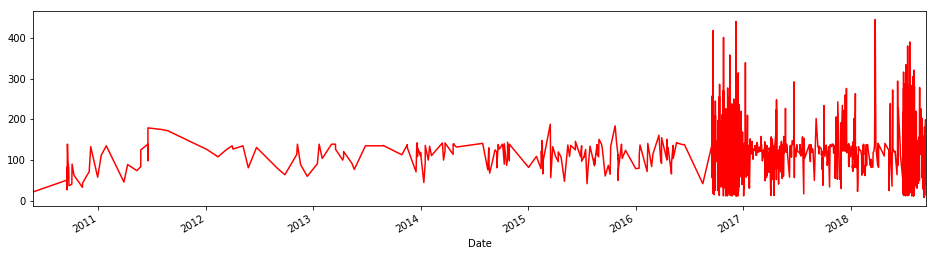

In [20]:
# Lengths along time:
tlen.plot(figsize=(16,4), color='r');

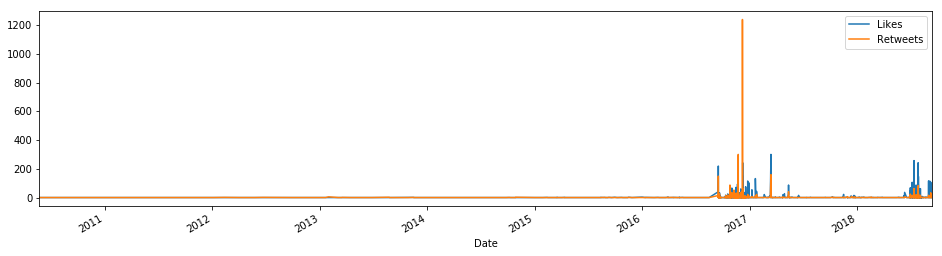

In [21]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

# Sentiment Analysis

In [25]:
# These functions should be put into a python file for usage on Instagram comments

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analyze_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob. Polarity is binned into 3 bins - 1, 0, and -1
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [24]:
# Create a column with the result of the analysis:
data['SA'] = np.array([ analyze_sentiment(tweet) for tweet in data['Tweets'] ])

# Display the updated dataframe with the new column:
display(data.sample(10))

,Tweets,user,len,ID,Date,Source,Likes,RTs,Replies,SA
1687,Ali Caldwell should be the real winner of #The...,Finesse101_,82,1025201060808249344,2018-08-03 02:05:54,/Finesse101_/status/1025201060808249344,2,0,0,1
5293,The Voice Live Playoffs: Ali Caldwell And Bill...,eugenplaton,162,801239880823021568,2016-11-23 01:44:08,/eugenplaton/status/801239880823021568,0,0,0,1
3217,I liked a @YouTube video http://youtu.be/KMym0...,RoberthNavy,119,1012391112940638208,2018-06-28 17:43:45,/RoberthNavy/status/1012391112940638210,0,0,0,-1
4620,"Billy Gilman, Sundance Head, Wé McDonald and A...",Snowx2k5,90,805972180785827840,2016-12-06 03:08:36,/Snowx2k5/status/805972180785827841,0,1,0,1
2586,Ali Caldwell really bout to blow up,itsMayaMaya,35,1019974452459732992,2018-07-19 15:57:14,/itsMayaMaya/status/1019974452459732994,1,1,0,1
4803,"New trending GIF tagged season 11, nbc, the vo...",ZakkisBatman,96,805947606589472768,2016-12-06 01:30:57,/ZakkisBatman/status/805947606589472768,0,0,0,1
473,#Entertainment Ali Caldwell & Lauren Diaz Face...,yasminmitri,138,790853869362225152,2016-10-25 09:53:50,/yasminmitri/status/790853869362225152,0,0,0,-1
3014,"Ali Caldwell Performs ""Set Fire To The Rain"" |...",DerekDe91760774,114,1013210593791053824,2018-07-01 00:00:04,/DerekDe91760774/status/1013210593791053825,0,0,0,0
5662,I liked a @YouTube video http://youtu.be/PPBfQ...,Joni_Daniela,115,798412655040102400,2016-11-15 06:29:45,/Joni_Daniela/status/798412655040102400,0,0,0,1
1016,ALI CALDWELL!!,xojpocaigue,15,779179184669073408,2016-09-23 04:42:48,/xojpocaigue/status/779179184669073408,0,0,1,0


Analyzing results

In [26]:
# Construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [27]:
# Print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))


Percentage of positive tweets: 47.934415688796015%
Percentage of neutral tweets: 37.325188876386434%
Percentage of negative tweets: 14.740395434817554%


Time Series

In [28]:
# Construct columns for year, month, and day of tweet

data['twt_yr'] = [date.year for date in data['Date']]
data['twt_month'] = [date.month for date in data['Date']]
data['twt_day'] = [date.day for date in data['Date']]

2011 - 2018 Sentiment Analysis

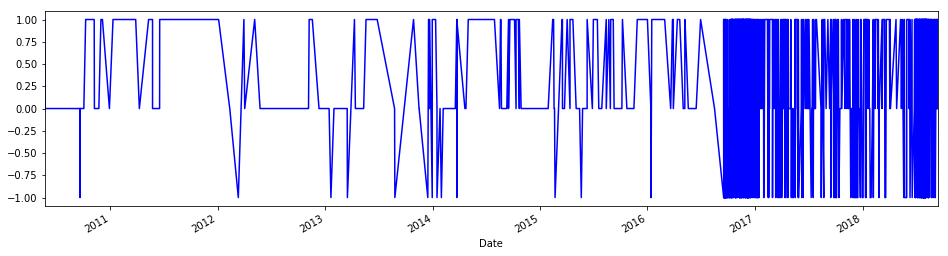

In [30]:
tsent = pd.Series(data=data['SA'].values, index=data['Date'])
tsent.plot(figsize=(16,4), color='b');

#### 2017-2018 Sentiment Analysis

In [ ]:
data[data['twt_yr']> 2016]

In [4]:
tsent_year = pd.Series(data=data[data['twt_yr'] > 2016]['SA'].values, index=data[data['twt_yr'] > 2016]['Date'])
tsent_year.plot(figsize=(16,4), color='r');

NameError: name 'data' is not defined

#### Analyze Each Performance on The Four:
- 6/28
- 7/12
- 7/19
- 7/26

First performance 6/28

In [32]:
# Create DFs for each performance

first_date = data[(data['twt_yr'] == 2018) & (data['twt_month'] == 6)]

In [33]:
first_counts = pd.Series(data=data[(data['twt_yr'] == 2018) & (data['twt_month'] == 6) & (data['twt_day'] == 12)]['SA'].values, index=data[data['twt_yr'] > 2016]['Date'])
first_counts.plot(figsize=(16,4), color='r');

ValueError: Wrong number of items passed 0, placement implies 2211

# More preprocessing